<a href="https://colab.research.google.com/github/MarwaZAH/dissertatio-file/blob/main/marwa_corrected_(1)_Final_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler , RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix , accuracy_score , classification_report ,roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline

In [2]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras import Model
from keras.layers import Lambda, Input, Dropout, Flatten, LSTM, Concatenate, Bidirectional, Conv1D, MaxPooling1D
from keras import backend as K
from keras.callbacks import TensorBoard
from time import time
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.svm import SVR
from pandas import datetime
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import roc_curve
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import sys
from sklearn import linear_model
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import auc,confusion_matrix,precision_recall_curve,precision_score,recall_score, f1_score,fbeta_score, average_precision_score
from sklearn.preprocessing import label_binarize
from mlxtend.plotting import plot_confusion_matrix

In [4]:
# load dataset :
# ==================
#url='https://raw.githubusercontent.com/MarwaZAH/dissertatio-file/main/ma_23_ratios.csv'
#ratios = pd.read_csv(url)

ratios = pd.read_excel('marwa23ratios.xlsx')
ratios.head()

,year,Y,R1,R2,R3,R4,R5,R6,R7,R8,...,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23
0,2018,1,4.675849,6.034465,0.869802,3.317263,0.627628,1.616663,0.602000,0.959167,...,2.800523,0.357076,0.958923,3.433186,0.113609,0.068392,0.191535,0.068392,0.183667,0.130614
1,2017,1,4.848808,5.823598,0.967639,3.861509,0.667390,1.717557,0.571276,0.855985,...,2.610269,0.383102,1.151807,3.342922,0.151655,0.086637,0.226145,0.086637,0.260475,0.156726
2,2016,1,4.449737,5.387504,0.755265,3.648620,0.650528,2.007167,0.701450,1.078278,...,2.610269,0.403649,1.155025,3.342922,0.099223,0.069600,0.172427,0.066057,0.199158,0.131376
3,2015,1,8.124334,9.276282,0.971036,6.540571,0.816302,4.082930,0.750027,0.918811,...,1.455663,0.686972,3.739679,7.806609,0.105217,0.078915,0.114874,0.078915,0.429592,0.108355
4,2014,1,5.301444,6.719141,1.292496,3.904936,0.798386,2.607834,0.525776,0.658549,...,1.338176,0.747286,3.706514,6.289086,0.083230,0.043760,0.058559,0.043760,0.217049,0.064394


In [5]:
ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1128 non-null   int64  
 1   Y       1128 non-null   int64  
 2   R1      1117 non-null   float64
 3   R2      1117 non-null   float64
 4   R3      1086 non-null   float64
 5   R4      1117 non-null   float64
 6   R5      1118 non-null   float64
 7   R6      1113 non-null   float64
 8   R7      1118 non-null   float64
 9   R8      1118 non-null   float64
 10  R9      1119 non-null   float64
 11  R10     1108 non-null   float64
 12  R11     1118 non-null   float64
 13  R12     1118 non-null   float64
 14  R13     1119 non-null   float64
 15  R14     1117 non-null   float64
 16  R15     1118 non-null   float64
 17  R16     1113 non-null   float64
 18  R17     1117 non-null   float64
 19  R18     1086 non-null   float64
 20  R19     1118 non-null   float64
 21  R20     1117 non-null   float64
 22  

In [ ]:
ratios.columns

Index(['year', 'Y', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9',
       'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19',
       'R20', 'R21', 'R22', 'R23'],
      dtype='object')

In [6]:
# Drop the column 'year'
# ========================

ratios.drop(columns = 'year' , inplace = True)


# Change 'Y' to categorical variable
# ====================================

ratios['Y']=ratios['Y'].astype('str')

In [7]:
ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1128 non-null   object 
 1   R1      1117 non-null   float64
 2   R2      1117 non-null   float64
 3   R3      1086 non-null   float64
 4   R4      1117 non-null   float64
 5   R5      1118 non-null   float64
 6   R6      1113 non-null   float64
 7   R7      1118 non-null   float64
 8   R8      1118 non-null   float64
 9   R9      1119 non-null   float64
 10  R10     1108 non-null   float64
 11  R11     1118 non-null   float64
 12  R12     1118 non-null   float64
 13  R13     1119 non-null   float64
 14  R14     1117 non-null   float64
 15  R15     1118 non-null   float64
 16  R16     1113 non-null   float64
 17  R17     1117 non-null   float64
 18  R18     1086 non-null   float64
 19  R19     1118 non-null   float64
 20  R20     1117 non-null   float64
 21  R21     1119 non-null   float64
 22  

In [8]:
# Checking the missing value in each column 
# ===========================================

ratios.isnull().sum()

Y       0
R1     11
R2     11
R3     42
R4     11
R5     10
R6     15
R7     10
R8     10
R9      9
R10    20
R11    10
R12    10
R13     9
R14    11
R15    10
R16    15
R17    11
R18    42
R19    10
R20    11
R21     9
R22    15
R23     9
dtype: int64

In [9]:
# Total cells of missed values 
# =============================

ratios.isnull().sum().sum()

321

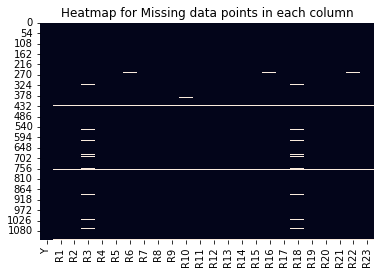

In [10]:
#====================================================
# Using heatmap to check for missing values
#----------------------------------------------------
import seaborn as sns
sns.heatmap(ratios.isnull(), cbar = False)
plt.title("Heatmap for Missing data points in each column")
plt.show()

In [11]:
ratios.to_csv("corrected.csv",index = True)

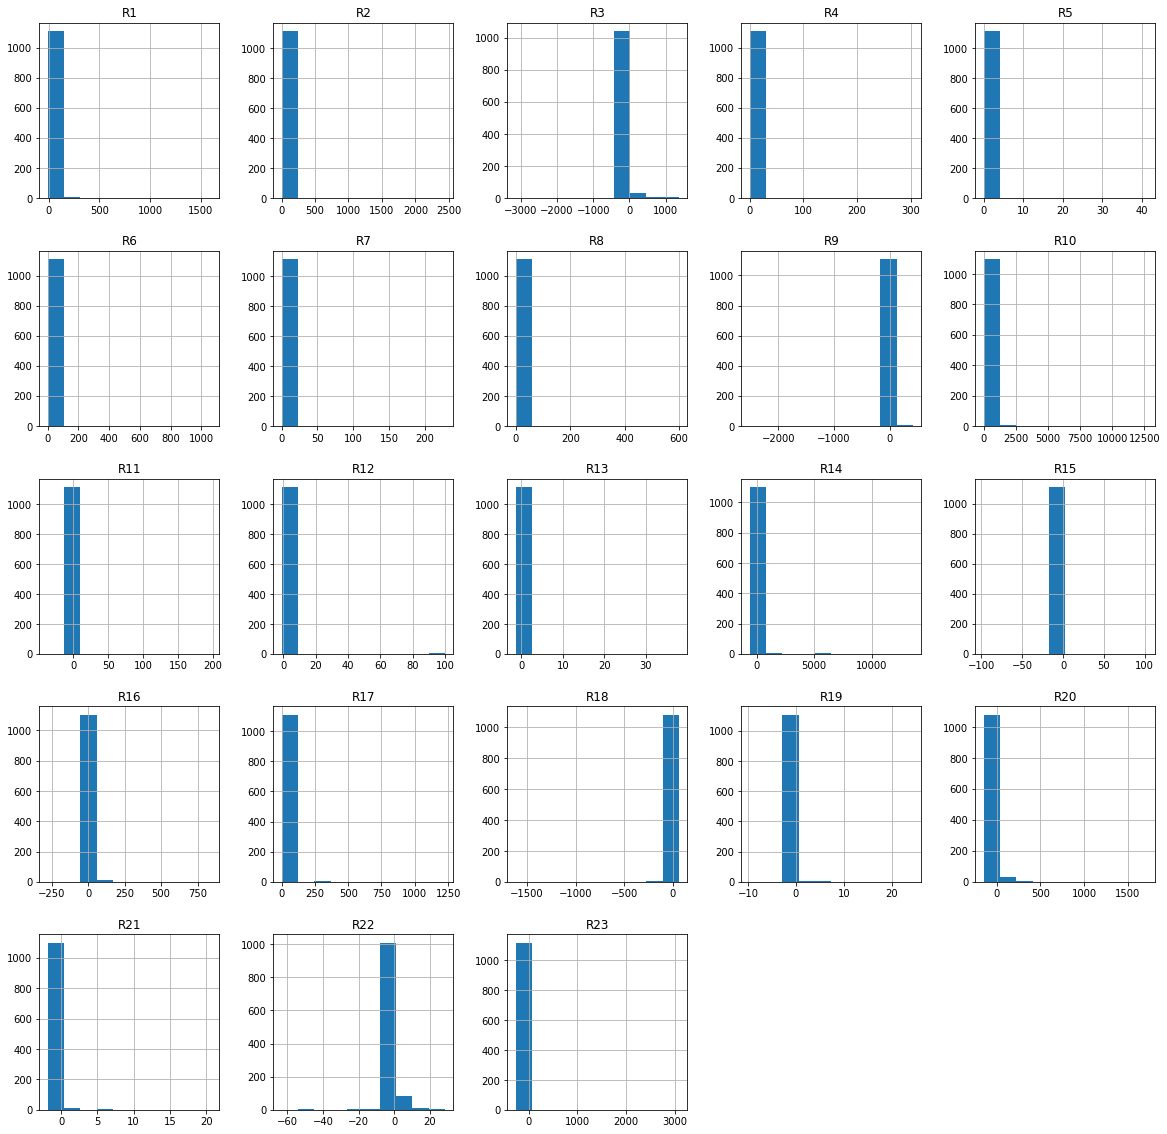

In [12]:
ratios.hist(figsize = (20,20))
plt.show()

In [13]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
R1,1117.0,4.174735,49.700082,-11.163142,0.541711,0.991845,1.797886,1602.477317
R2,1117.0,5.326521,74.252597,-0.877212,0.789045,1.351628,2.295636,2443.901216
R3,1086.0,1.129383,162.868192,-3145.547197,-0.144478,0.279143,0.821096,1371.192875
R4,1117.0,1.205675,10.610550,-0.352761,0.044015,0.160284,0.619196,304.139677
R5,1118.0,0.642602,1.748234,0.000076,0.345658,0.605339,0.798554,41.400295
R6,1113.0,6.500092,35.607320,-0.476797,0.341168,1.120364,3.668182,1063.429137
R7,1118.0,0.920551,7.710942,-0.371720,0.172643,0.406391,0.821748,228.796965
R8,1118.0,2.607711,24.204193,-1.686706,0.383732,0.749940,1.446541,601.217573
R9,1119.0,0.067116,81.334017,-2520.494833,-0.108430,0.879888,2.933408,423.662068
R10,1108.0,48.232644,438.001249,-2.732728,1.901498,5.821614,15.085594,12711.204644


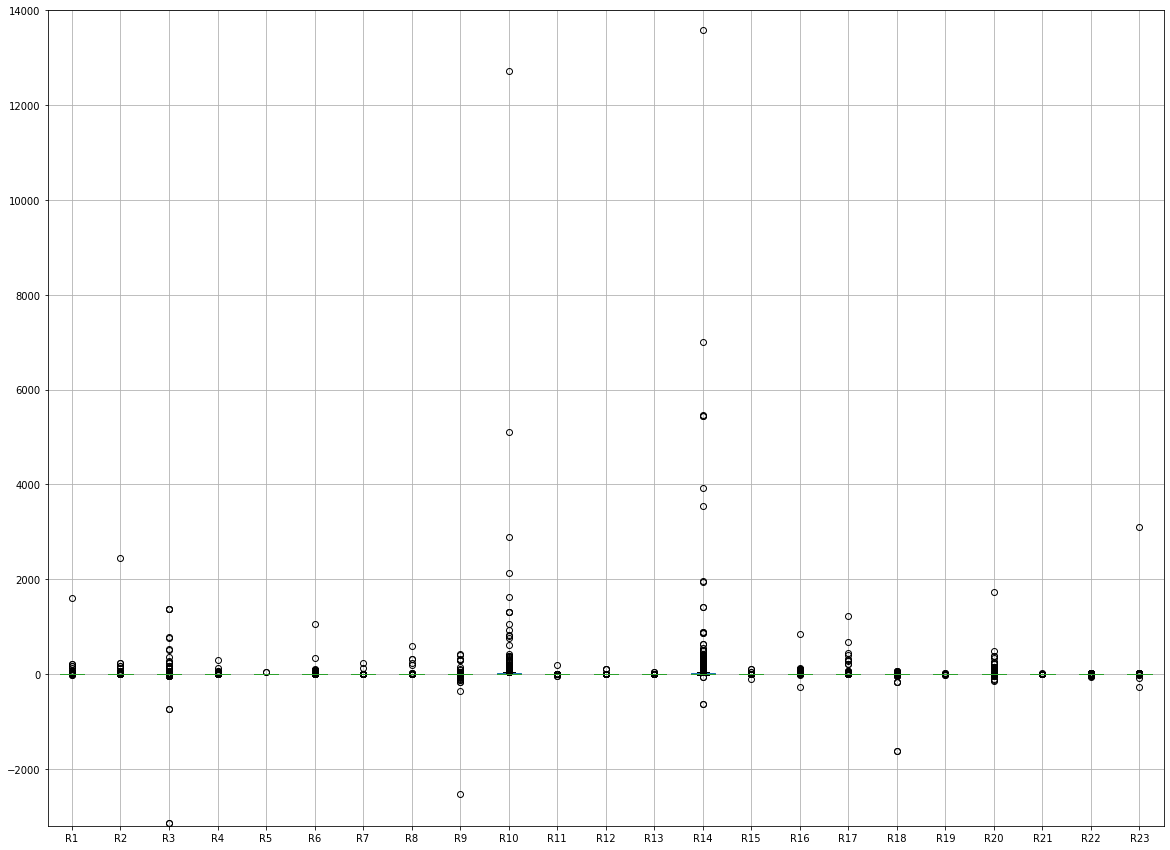

In [14]:
ratios.boxplot(figsize = (20,15))
plt.ylim(-3200,+14000)
plt.show()

In [15]:
# Impution : 
# ===========

imputer = KNNImputer(n_neighbors =5)
ratios_filled = imputer.fit_transform(ratios)

In [16]:
type(ratios_filled)

numpy.ndarray

In [17]:
ratios_filled.shape

(1128, 24)

In [18]:
ratios_filled[:3,]

array([[1.        , 4.67584864, 6.03446493, 0.86980162, 3.31726254,
        0.62762787, 1.61666261, 0.6020001 , 0.95916725, 1.14968744,
        1.74483058, 0.64292388, 1.        , 0.35707612, 2.80052334,
        0.35707612, 0.95892278, 3.43318614, 0.11360868, 0.06839244,
        0.19153461, 0.06839244, 0.1836669 , 0.13061447],
       [1.        , 4.84880808, 5.82359769, 0.96763921, 3.8615087 ,
        0.66739028, 1.71755715, 0.5712762 , 0.8559852 , 1.03344303,
        1.29092378, 0.61689774, 1.        , 0.38310226, 2.61026914,
        0.38310226, 1.15180716, 3.34292165, 0.15165458, 0.08663665,
        0.22614498, 0.08663665, 0.26047541, 0.15672637],
       [1.        , 4.4497371 , 5.38750433, 0.75526461, 3.64862031,
        0.6505275 , 2.00716673, 0.70144957, 1.07827811, 1.32403926,
        1.59217115, 0.64998405, 1.05363337, 0.38310226, 2.61026914,
        0.40364932, 1.15502458, 3.34292165, 0.09922342, 0.06960023,
        0.17242746, 0.06605735, 0.19915795, 0.13137571]])

In [19]:
ratios= pd.DataFrame(data =ratios_filled , columns = ratios.columns)
ratios.head()

,Y,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23
0,1.0,4.675849,6.034465,0.869802,3.317263,0.627628,1.616663,0.602000,0.959167,1.149687,...,2.800523,0.357076,0.958923,3.433186,0.113609,0.068392,0.191535,0.068392,0.183667,0.130614
1,1.0,4.848808,5.823598,0.967639,3.861509,0.667390,1.717557,0.571276,0.855985,1.033443,...,2.610269,0.383102,1.151807,3.342922,0.151655,0.086637,0.226145,0.086637,0.260475,0.156726
2,1.0,4.449737,5.387504,0.755265,3.648620,0.650528,2.007167,0.701450,1.078278,1.324039,...,2.610269,0.403649,1.155025,3.342922,0.099223,0.069600,0.172427,0.066057,0.199158,0.131376
3,1.0,8.124334,9.276282,0.971036,6.540571,0.816302,4.082930,0.750027,0.918811,1.029828,...,1.455663,0.686972,3.739679,7.806609,0.105217,0.078915,0.114874,0.078915,0.429592,0.108355
4,1.0,5.301444,6.719141,1.292496,3.904936,0.798386,2.607834,0.525776,0.658549,0.773697,...,1.338176,0.747286,3.706514,6.289086,0.083230,0.043760,0.058559,0.043760,0.217049,0.064394


In [20]:
ratios.isnull().sum().sum()

0

In [21]:
def drop_outlier(data):
    features = data.columns[1:]
    for feature in features :
        indexes = data.index[(data[feature] < -100 ) | (data[feature] > 600)]
        data.drop(index = indexes , inplace = True)
    return data  

In [22]:
drop_outlier(ratios)

,Y,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23
0,1.0,4.675849,6.034465,0.869802,3.317263,0.627628,1.616663,0.602000,0.959167,1.149687,...,2.800523,0.357076,0.958923,3.433186,0.113609,0.068392,0.191535,0.068392,0.183667,0.130614
1,1.0,4.848808,5.823598,0.967639,3.861509,0.667390,1.717557,0.571276,0.855985,1.033443,...,2.610269,0.383102,1.151807,3.342922,0.151655,0.086637,0.226145,0.086637,0.260475,0.156726
2,1.0,4.449737,5.387504,0.755265,3.648620,0.650528,2.007167,0.701450,1.078278,1.324039,...,2.610269,0.403649,1.155025,3.342922,0.099223,0.069600,0.172427,0.066057,0.199158,0.131376
3,1.0,8.124334,9.276282,0.971036,6.540571,0.816302,4.082930,0.750027,0.918811,1.029828,...,1.455663,0.686972,3.739679,7.806609,0.105217,0.078915,0.114874,0.078915,0.429592,0.108355
4,1.0,5.301444,6.719141,1.292496,3.904936,0.798386,2.607834,0.525776,0.658549,0.773697,...,1.338176,0.747286,3.706514,6.289086,0.083230,0.043760,0.058559,0.043760,0.217049,0.064394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.0,1.549620,2.424142,1.509095,0.374797,0.330770,0.192411,0.128767,0.389295,0.662649,...,2.915595,0.342983,0.512504,2.513649,-0.450701,-0.058035,-0.169208,-0.058035,-0.086720,-0.298656
1124,0.0,0.926385,1.854461,1.040102,0.065614,0.257669,0.153767,0.114146,0.442995,0.961444,...,2.250146,0.444416,0.598676,3.198489,-0.560579,-0.063988,-0.143982,-0.063988,-0.086199,-0.538965
1125,0.0,0.872099,1.517626,0.822528,0.116966,0.309824,0.186147,0.128474,0.414668,1.215764,...,5.012986,0.199482,0.289030,0.977133,-0.464946,-0.059733,-0.299443,-0.059733,-0.086548,-0.565264
1126,0.0,0.283525,0.371166,-1.410156,0.022345,0.462616,0.860053,0.310233,0.712230,-0.604617,...,166.081327,0.571345,0.512604,0.132229,-0.221505,-0.240146,-26.347634,-0.187087,-0.342653,0.148959


In [23]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,1063.0,0.689558,0.462892,0.000000,0.000000,1.000000,1.000000,1.000000
R1,1063.0,2.661525,13.459945,-11.163142,0.539807,0.986762,1.788801,223.487943
R2,1063.0,3.061587,13.507974,-0.877212,0.786628,1.354647,2.277999,224.686076
R3,1063.0,3.590398,33.192760,-47.748556,-0.177762,0.279909,0.838151,531.831462
R4,1063.0,0.850482,5.118886,-0.352761,0.044577,0.160223,0.584468,138.598960
R5,1063.0,0.648370,1.791187,0.000634,0.352139,0.605539,0.798470,41.400295
R6,1063.0,5.081602,12.256718,-0.476797,0.364690,1.105982,3.582875,101.192842
R7,1063.0,0.602974,0.721253,-0.371720,0.179572,0.398347,0.778532,12.374662
R8,1063.0,1.719139,14.113252,-1.686706,0.393867,0.739597,1.435295,324.246186
R9,1063.0,2.995857,24.266330,-78.100626,-0.108894,0.917766,3.043470,396.800148


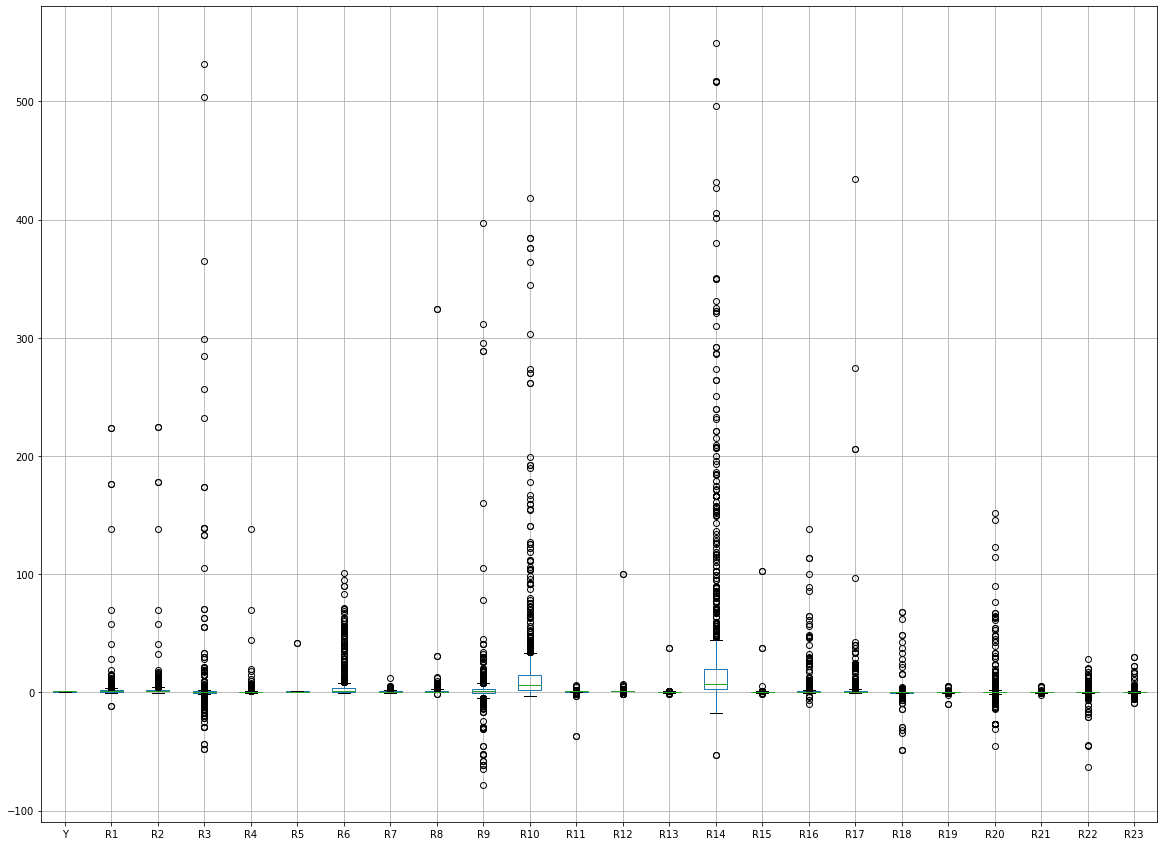

In [24]:
ratios.boxplot(figsize = (20,15))
plt.show()

In [25]:
ratios.isnull().sum().sum()

0

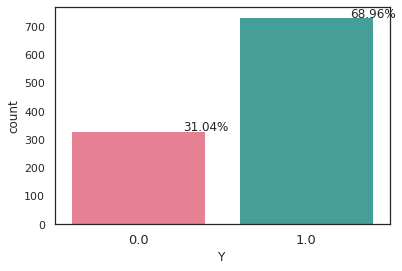

In [26]:
# Plot the target variable
sns.set(style="white")
ax=sns.countplot(x='Y', data=ratios, palette="husl")
plt.xticks(size=13)
total = float(len(ratios))
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = False

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [27]:

# Splitting DataSet into features and Target 
# =========================================
X = ratios.drop(columns = ['Y'])
y = ratios['Y']
# Splitting Dataset into Train and Test  Sets 
# ============================================
#X_train , X_test , y_train ,y_test

trainX, testX, trainy, testy=train_test_split(X , y , test_size = 0.2 , random_state = 253)

In [28]:
trainX.shape

(850, 23)

In [29]:
trainy.shape

(850,)

In [30]:
# Create the Robust scaler object
# ====================================
#robust_scaler = RobustScaler().fit(X_train)

# Transform the data
# ====================
#X_robust= robust_scaler.transform(X_train)

In [31]:
# Create the Min Max Scaler 
# ==============================
min_max = MinMaxScaler().fit(trainX)

# Transform the data
# ====================
testX = min_max.transform(testX)

##Deep Learning

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model2(layers):
        d = 0.2
        model = Sequential()
        #Input_layer
        model.add(LSTM(23, input_shape=(layers[0], layers[1]), return_sequences=True))
        #model.add(Dropout(d))
        #LSTM_layer
        model.add(LSTM(30, input_shape=(layers[0], layers[1]), return_sequences=False))
        model.add(Dense(30, activation='relu'))
        #Output_layer        
        model.add(Dense(2, activation='sigmoid' ))
        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        tf.keras.utils.plot_model(model, to_file="model1.png", show_shapes=True,
    show_dtype=True,  show_layer_names=True, rankdir="TB", expand_nested=False,  dpi=300,  layer_range=None,)
        tf.keras.utils.model_to_dot(model, show_shapes=True,  show_dtype=True,  show_layer_names=True, rankdir="TB", expand_nested=False,  dpi=300,  layer_range=None,)
        return model

def build_model3(layers,Nueron,N_layer):
        d = 0.2
        #input_shape = X_train.shape
        model = Sequential()

        # The Input Layer :
        model.add(LSTM(23, input_shape=(layers[0], layers[1]), return_sequences=True))
        #model.add(Dropout(d))
        # The Hidden Layers :
        for i in range(N_layer-1):
            model.add(LSTM(Nueron, input_shape=(layers[0], layers[1]), return_sequences=True))

        model.add(LSTM(Nueron, input_shape=(layers[0], layers[1]), return_sequences=False))
        model.add(Dense(Nueron, activation='relu'))        
        # The Output Layer :
        model.add(Dense(2, activation='sigmoid'))
        # Compile the network :
        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        tf.keras.utils.plot_model(  model, to_file="model22.png", show_shapes=True,
    show_dtype=True,  show_layer_names=True, rankdir="TB", expand_nested=False,  dpi=300,  layer_range=None,)
        tf.keras.utils.model_to_dot(  model,  show_shapes=True,
    show_dtype=True,  show_layer_names=True, rankdir="TB", expand_nested=False,  dpi=300,  layer_range=None,)
        return model

# plotting

In [33]:
get_ipython().magic('matplotlib inline')
style = sns.axes_style("whitegrid")
style["axes.grid"] = False
sns.set_style("whitegrid", style)

## **Evaluate Metrics**

In [34]:
def F_b(beta,recal,precision):
  return (1+beta**2)*((recal*precision)/(recal+(beta**2)*precision))
  
def plot_precision_recall_curve(model,testy2,yhat):
  # calculate precision-recall curve
  precision, recall, thresholds = precision_recall_curve(np.argmax(testy2, axis=1), np.argmax(yhat, axis=1))
  # calculate F1 score
  f1 = f1_score(np.argmax(testy2, axis=1), np.argmax(yhat, axis=1))
  probas = model.predict(X_test2, batch_size=64)
  skplt.metrics.plot_precision_recall_curve(y_test, probas)
  plt.show()

def plot_history(history,name_f):
  plt.plot(history.history['accuracy'], label='training accuracy')
  plt.plot(history.history['val_accuracy'], label='testing accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()
  
  file_name=name_f+"_Accuracy.pdf"
  plt.savefig(file_name, bbox_inches="tight")
  plt.show()

def plot_history2(history,name_f):
  plt.plot(history.history['loss'], label='training loss')
  plt.plot(history.history['val_loss'], label='testing loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  
  file_name=name_f+"_Loss.pdf"
  plt.savefig(file_name, bbox_inches="tight")
  plt.show()

def plot_auc(model, testy2, yhat, name_f):
  # Binarize the output
  y = label_binarize(testy2, classes=[0, 1])
  n_classes = y.shape[1]
  y_test=testy2
  y_score=yhat
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  plt.figure()
  lw = 2
  plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  file_name=name_f+"_AUC_ROC.pdf"
  #dest1 = os.path.join(path, file_name)
  plt.savefig(file_name, bbox_inches="tight")
  plt.show()

def Evaluate_model(model,history,name_file,algo,time,score_table,X_test,y_test):
  #X_train, y_train, X_test, y_test
  testy2 = to_categorical(y_test)
  loss, acc = model.evaluate(X_test, testy2, verbose=0)
  print('Model Accuracy: %.3f' % acc)

  # evaluate model on test set np.argmax(y_pred, axis=1)
  yhat = model.predict(X_test)
  acc = accuracy_score(np.argmax(testy2, axis=1), np.argmax(yhat, axis=1))
   
  precision, recall, f1, support = precision_recall_fscore_support(np.argmax(testy2, axis=1), np.argmax(yhat, axis=1))
  precision=np.average(precision, weights=support)
  recall=np.average(recall, weights=support)
  f1=np.average(f1, weights=support)
  fb = fbeta_score(np.argmax(testy2, axis=1), np.argmax(yhat, axis=1), average='micro', beta=3)

  score_table.loc[algo,:] = time, acc, precision,recall,f1, F_b(3,recall,precision),fb
  CM = confusion_matrix(np.argmax(testy2, axis=1), np.argmax(yhat, axis=1))
  fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
  plt.show()

  plot_precision_recall_curve(model,testy2,yhat)
  plot_auc(model,testy2,yhat,name_file)
  # print(history.history.keys())
  plot_history(history,name_file)
  plot_history2(history,name_file)

# Feature selection

In [35]:
X_train = trainX
X_test = testX
y_train =trainy
y_test = testy

In [36]:
from sklearn.ensemble import RandomForestClassifier
import time
from pylab import *
rcParams['figure.figsize'] = 15,8

feature_names = [f'R{i+1}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Elapsed time to compute the importances: 0.019 seconds


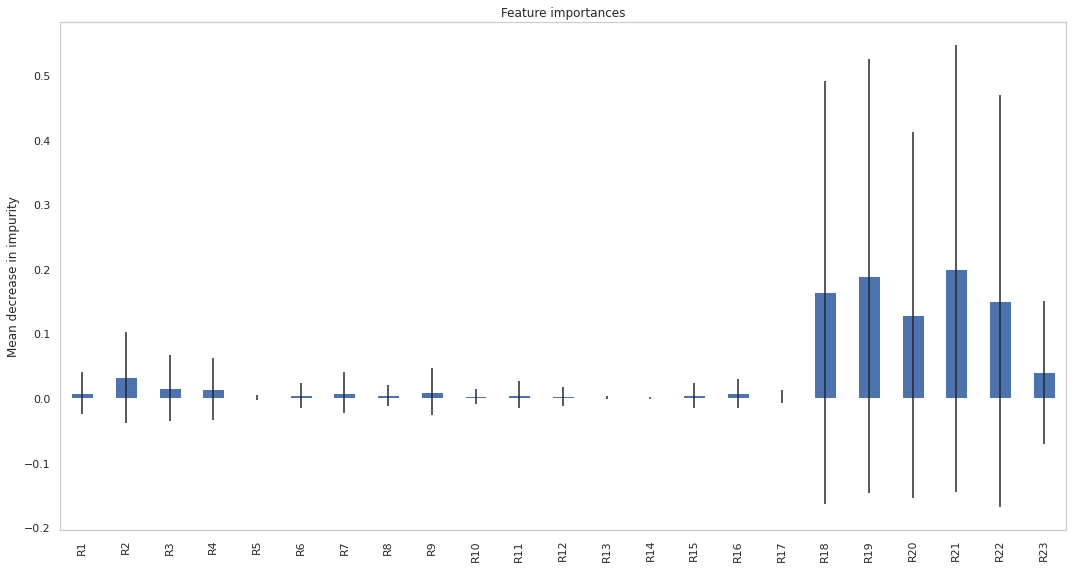

In [37]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: " f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [38]:
new_features=forest_importances.sort_values(ascending=False).head(10)
new_features

R21    0.200261
R19    0.189839
R18    0.163880
R22    0.151100
R20    0.129491
R23    0.039927
R2     0.032427
R3     0.015438
R4     0.013836
R9     0.010317
dtype: float64

In [39]:
new_features.index

Index(['R21', 'R19', 'R18', 'R22', 'R20', 'R23', 'R2', 'R3', 'R4', 'R9'], dtype='object')

In [40]:
X[new_features.index]

,R21,R19,R18,R22,R20,R23,R2,R3,R4,R9
0,0.068392,0.068392,0.113609,0.183667,0.191535,0.130614,6.034465,0.869802,3.317263,1.149687
1,0.086637,0.086637,0.151655,0.260475,0.226145,0.156726,5.823598,0.967639,3.861509,1.033443
2,0.066057,0.069600,0.099223,0.199158,0.172427,0.131376,5.387504,0.755265,3.648620,1.324039
3,0.078915,0.078915,0.105217,0.429592,0.114874,0.108355,9.276282,0.971036,6.540571,1.029828
4,0.043760,0.043760,0.083230,0.217049,0.058559,0.064394,6.719141,1.292496,3.904936,0.773697
...,...,...,...,...,...,...,...,...,...,...
1123,-0.058035,-0.058035,-0.450701,-0.086720,-0.169208,-0.298656,2.424142,1.509095,0.374797,0.662649
1124,-0.063988,-0.063988,-0.560579,-0.086199,-0.143982,-0.538965,1.854461,1.040102,0.065614,0.961444
1125,-0.059733,-0.059733,-0.464946,-0.086548,-0.299443,-0.565264,1.517626,0.822528,0.116966,1.215764
1126,-0.187087,-0.240146,-0.221505,-0.342653,-26.347634,0.148959,0.371166,-1.410156,0.022345,-0.604617


In [41]:
X_new=X[new_features.index]

In [42]:
forest_importances

R1     0.007744
R2     0.032427
R3     0.015438
R4     0.013836
R5     0.000967
R6     0.004800
R7     0.008584
R8     0.004735
R9     0.010317
R10    0.002966
R11    0.005424
R12    0.003016
R13    0.000859
R14    0.000295
R15    0.004285
R16    0.007326
R17    0.002481
R18    0.163880
R19    0.189839
R20    0.129491
R21    0.200261
R22    0.151100
R23    0.039927
dtype: float64

## Data split

In [43]:
from numpy import array
window = 1
X_train,  X_test, y_train, y_test  = train_test_split(X_new, y, test_size=0.2, random_state=2)

X_train2 = np.reshape(array(X_train), (int(X_train.shape[0]/window), window, X_train.shape[1]))
X_test2  = np.reshape(array(X_test), (int(X_test.shape[0]/window), window,  X_test.shape[1] ))

y_train=y_train[:int(X_train.shape[0]/window)]
y_test=y_test[:int(X_test.shape[0]/window)]

X_train2.shape,y_train.shape, X_test2.shape,y_test.shape

((850, 1, 10), (850,), (213, 1, 10), (213,))

# Table to save final results

In [44]:
# initialize a score table to log the performance of various algorithms
index = ['LSTM_'+str(n) for n in [20,30,50,80]]
score_table_2 = pd.DataFrame(index = index, 
                             columns= ['Time','Accuracy','precision','recall','F1','F_b','Fb_metric'])

#Models fitting

In [45]:
from keras.utils.vis_utils import plot_model
import time

  
def fit_model(window1,Nueron1,N_layer1,X_train_f,y_train_f,X_test_f,y_test_f,Name1,path_model,score_table):
  layers=[window1,X_train_f.shape[2]]
  Nueron=Nueron1
  N_layer=N_layer1
  start_time = time.clock()

  model = build_model3(layers,Nueron,N_layer)
  y_train2 = to_categorical(y_train_f)
  print("X_train_f: ",X_train_f.shape)
  history = model.fit(X_train_f,y_train2,batch_size=30, epochs=1000,validation_split=0.1,verbose=1)
  
  # save the model
  path=path_model
  name_file=Name1+'_N_'+str(N_layer1)+'_L'
  name_file1=os.path.join(path, name_file)
  plot_model(model, show_shapes=True, to_file=name_file1+'_model.png')
  model.save(name_file1+'_model.h5')
  # summarize
  print(model.summary())
  time1 = time.clock() - start_time
  Evaluate_model(model,history,name_file1,Name1,time1,score_table,X_test_f,y_test_f)


#Results Summary- Single DL model

In [46]:
np.random.seed(2021)
import os
import shutil

try:
  os.mkdir('Single DL model')
  os.mkdir('Single layer model')
except:
  shutil.rmtree('Single DL model')
  os.mkdir('Single DL model')
  os.mkdir('Single layer model')

X_train_f:  (850, 1, 10)
Epoch 1/1000
26/26 [==============================] - 7s 40ms/step - loss: 0.6424 - accuracy: 0.7268 - val_loss: 0.5738 - val_accuracy: 0.7529
Epoch 2/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.4565 - accuracy: 0.7856 - val_loss: 0.4594 - val_accuracy: 0.7882
Epoch 3/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.3506 - accuracy: 0.8392 - val_loss: 0.3524 - val_accuracy: 0.8118
Epoch 4/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.2683 - accuracy: 0.8824 - val_loss: 0.2457 - val_accuracy: 0.9176
Epoch 5/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.1926 - accuracy: 0.9137 - val_loss: 0.1753 - val_accuracy: 0.9412
Epoch 6/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.1387 - accuracy: 0.9542 - val_loss: 0.1515 - val_accuracy: 0.9529
Epoch 7/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.1135 - accuracy: 0.9582 - val_loss: 0.12

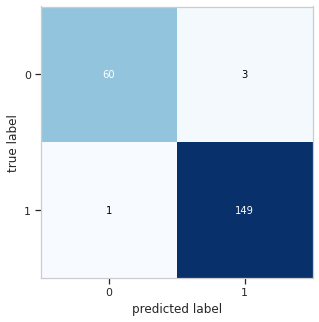

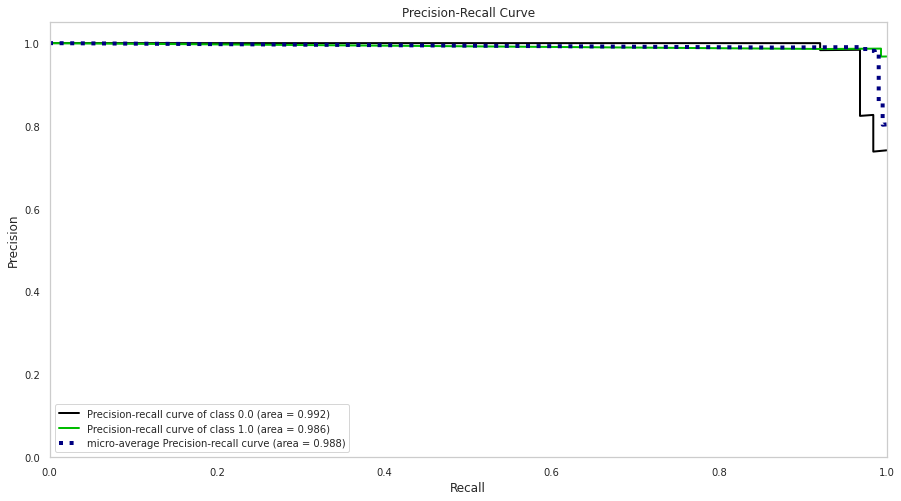

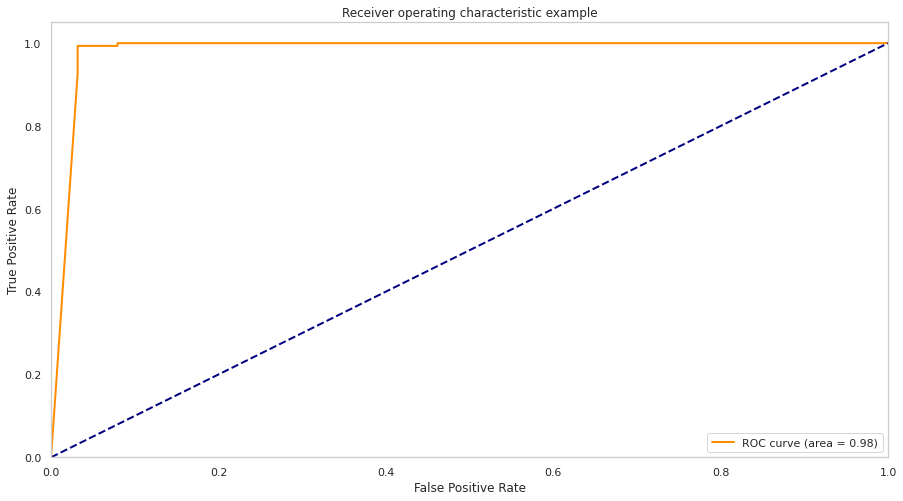

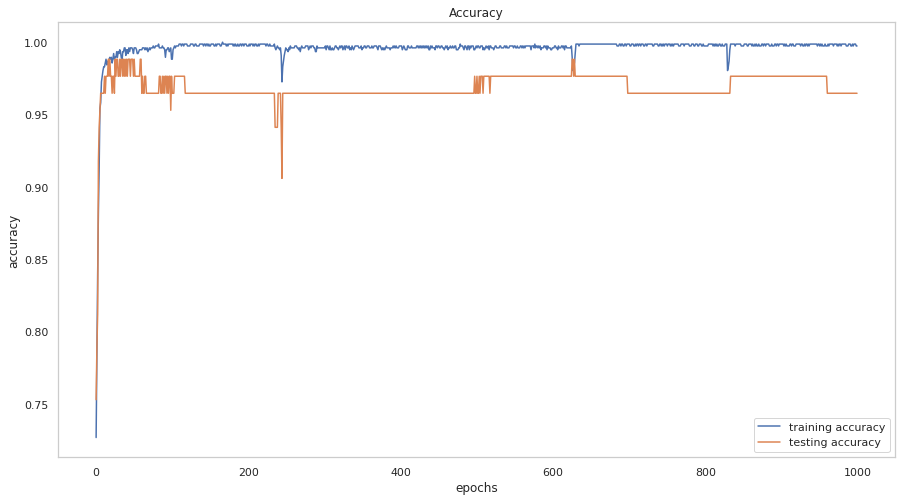

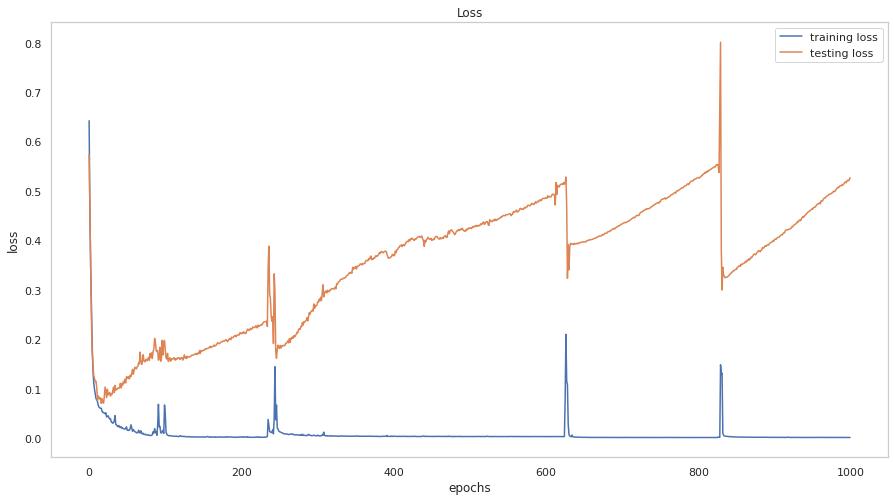

X_train_f:  (850, 1, 10)
Epoch 1/1000
26/26 [==============================] - 8s 47ms/step - loss: 0.6132 - accuracy: 0.7190 - val_loss: 0.5101 - val_accuracy: 0.7882
Epoch 2/1000
26/26 [==============================] - 1s 21ms/step - loss: 0.4407 - accuracy: 0.8092 - val_loss: 0.3898 - val_accuracy: 0.8235
Epoch 3/1000
26/26 [==============================] - 1s 22ms/step - loss: 0.3300 - accuracy: 0.8471 - val_loss: 0.3146 - val_accuracy: 0.8588
Epoch 4/1000
26/26 [==============================] - 1s 22ms/step - loss: 0.2571 - accuracy: 0.9046 - val_loss: 0.2163 - val_accuracy: 0.9294
Epoch 5/1000
26/26 [==============================] - 1s 23ms/step - loss: 0.2098 - accuracy: 0.9242 - val_loss: 0.2051 - val_accuracy: 0.9412
Epoch 6/1000
26/26 [==============================] - 1s 23ms/step - loss: 0.1814 - accuracy: 0.9268 - val_loss: 0.1759 - val_accuracy: 0.9294
Epoch 7/1000
26/26 [==============================] - 1s 21ms/step - loss: 0.1400 - accuracy: 0.9542 - val_loss: 0.16

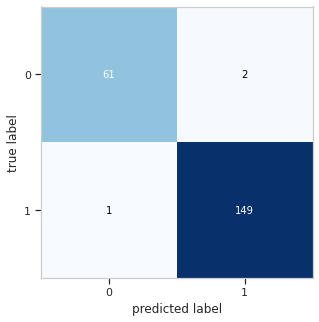

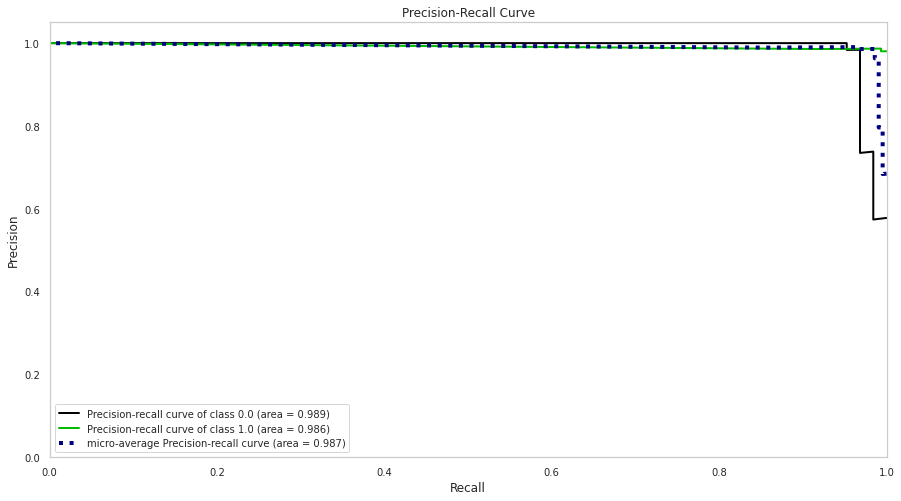

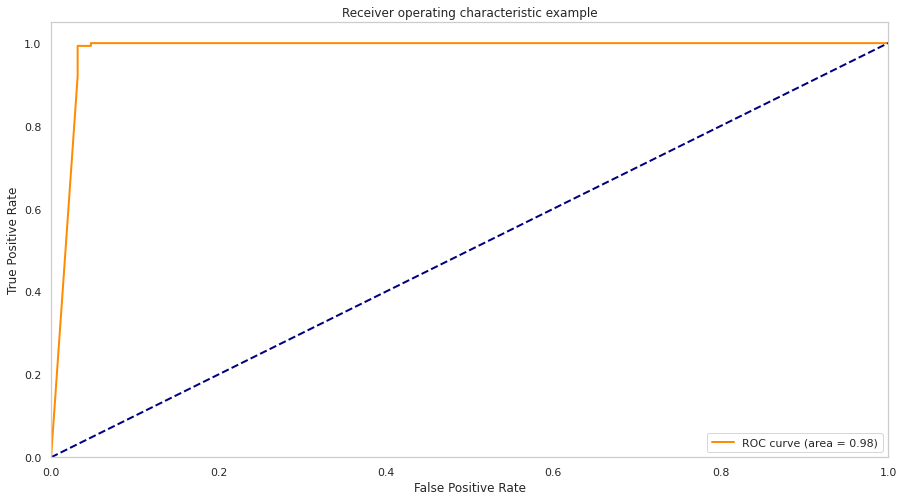

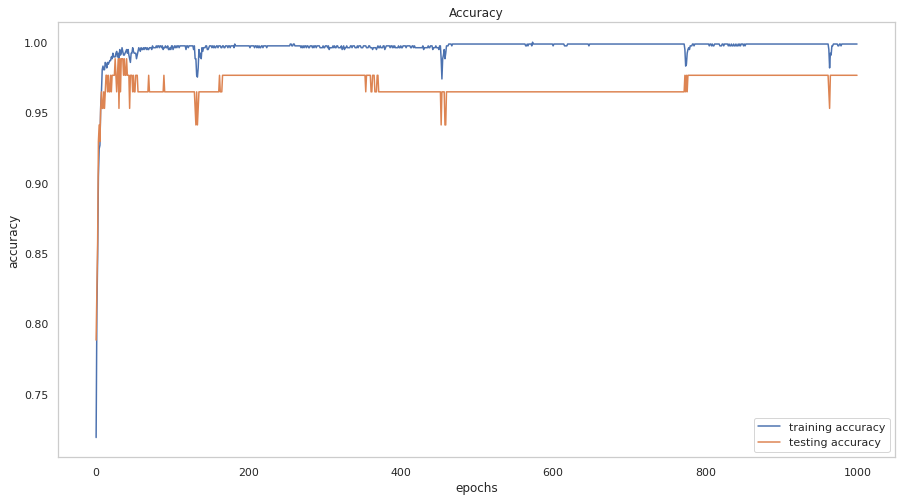

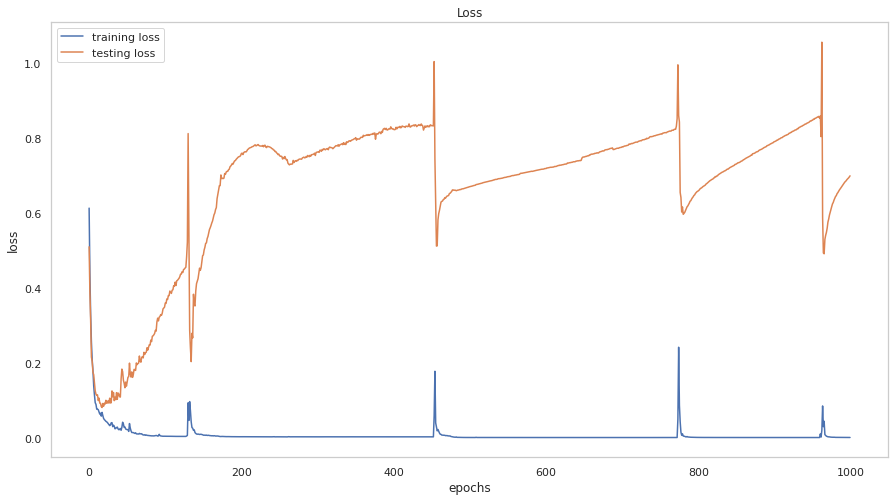

In [47]:
np.random.seed(12)
window1=1
N_layer1=1
path_model='./Single layer model/'
for n in [200,300]:
  Name1="LSTM_"+str(n)
  fit_model(window1,n,N_layer1,X_train2,y_train,X_test2,y_test,Name1,path_model,score_table_2)

In [50]:
score_table_2

,Time,Accuracy,precision,recall,F1,F_b,Fb_metric
LSTM_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM_50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM_80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSTM_200,514.655079,0.981221,0.981252,0.981221,0.981131,0.981224,0.981221
LSTM_300,810.640809,0.985915,0.985902,0.985915,0.985883,0.985914,0.985915


#Results Summary- Single DL + additional layer model

In [51]:
# initialize a score table to log the performance of various algorithms
index = ['LSTM_'+str(n)+'| Added Layer' for n in [50,70,90,100]]
score_table_3 = pd.DataFrame(index = index, 
                             columns= ['Time','Accuracy','precision','recall','F1','F_b','Fb_metric'])

try:
  os.mkdir('Single additional layer model')
except:
  shutil.rmtree('Single additional layer model')
  os.mkdir('Single additional layer model')

X_train_f:  (850, 1, 10)
Epoch 1/1000
26/26 [==============================] - 11s 47ms/step - loss: 0.6729 - accuracy: 0.6915 - val_loss: 0.6530 - val_accuracy: 0.6235
Epoch 2/1000
26/26 [==============================] - 0s 9ms/step - loss: 0.5784 - accuracy: 0.6954 - val_loss: 0.5560 - val_accuracy: 0.6706
Epoch 3/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.4764 - accuracy: 0.7752 - val_loss: 0.5099 - val_accuracy: 0.7765
Epoch 4/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.4160 - accuracy: 0.8275 - val_loss: 0.4479 - val_accuracy: 0.8000
Epoch 5/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.3575 - accuracy: 0.8484 - val_loss: 0.3818 - val_accuracy: 0.8235
Epoch 6/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.2900 - accuracy: 0.8784 - val_loss: 0.3042 - val_accuracy: 0.8824
Epoch 7/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.2202 - accuracy: 0.9203 - val_loss: 0.23

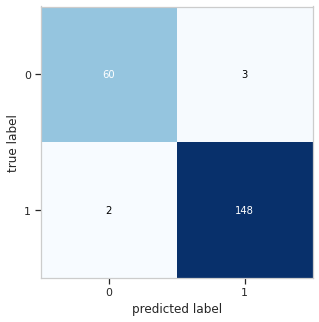

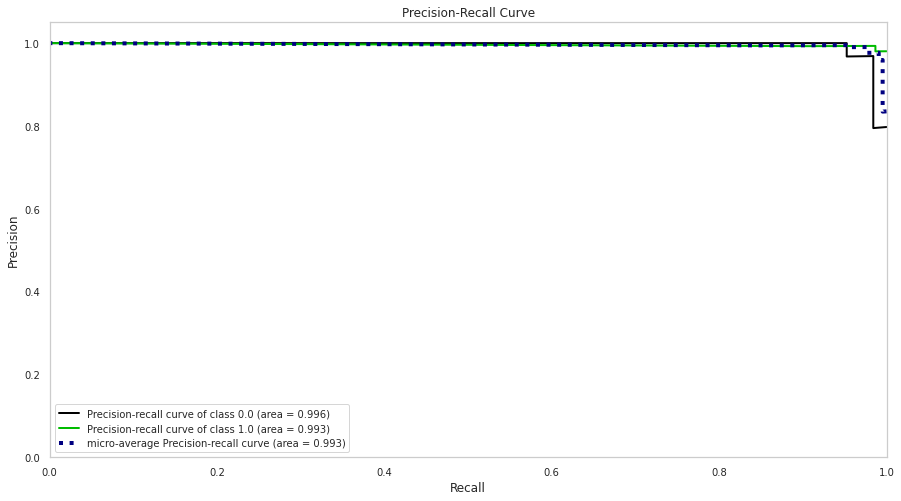

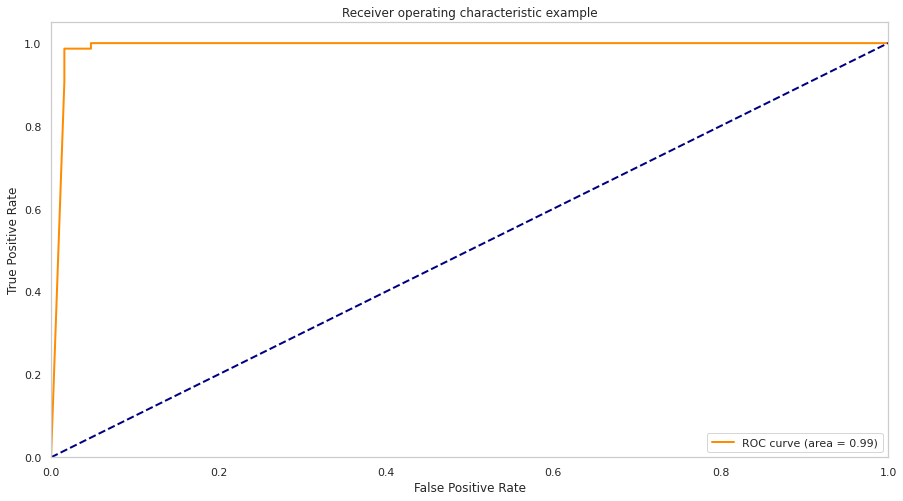

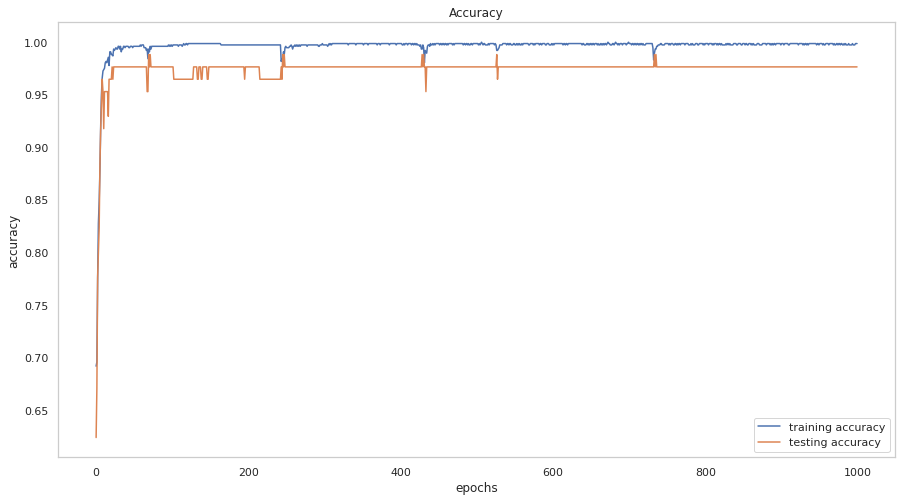

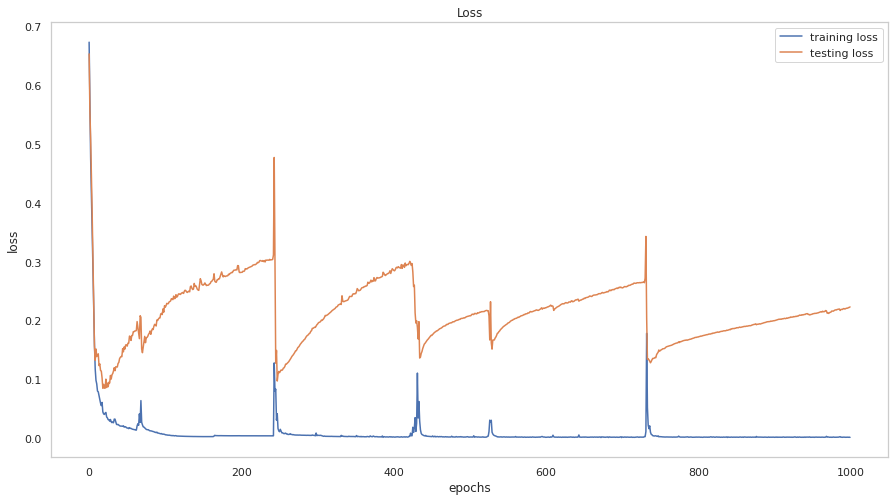

X_train_f:  (850, 1, 10)
Epoch 1/1000
26/26 [==============================] - 10s 47ms/step - loss: 0.6740 - accuracy: 0.6745 - val_loss: 0.6486 - val_accuracy: 0.6235
Epoch 2/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.5652 - accuracy: 0.7242 - val_loss: 0.5340 - val_accuracy: 0.7647
Epoch 3/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.4416 - accuracy: 0.8078 - val_loss: 0.4531 - val_accuracy: 0.7882
Epoch 4/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.3459 - accuracy: 0.8562 - val_loss: 0.3648 - val_accuracy: 0.7882
Epoch 5/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.2628 - accuracy: 0.8967 - val_loss: 0.2252 - val_accuracy: 0.9176
Epoch 6/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.1876 - accuracy: 0.9307 - val_loss: 0.1506 - val_accuracy: 0.9529
Epoch 7/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.1351 - accuracy: 0.9608 - val_loss: 0.1

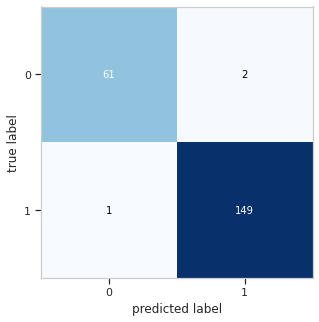

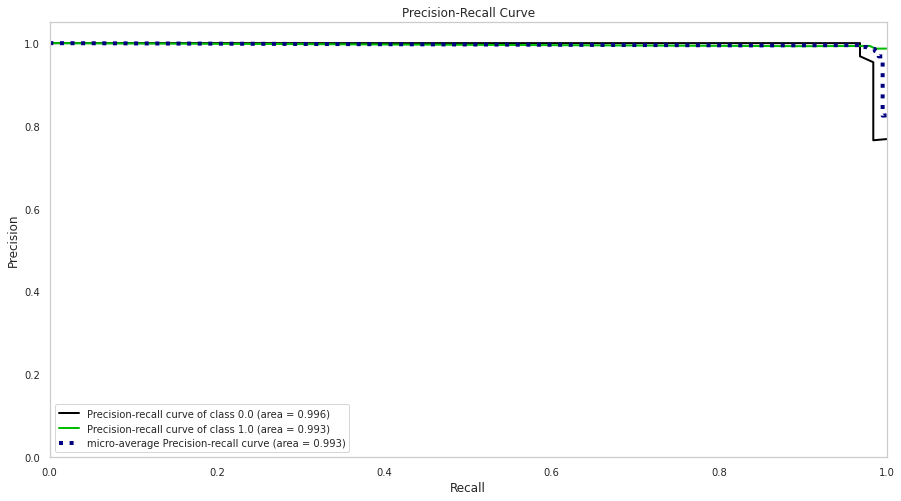

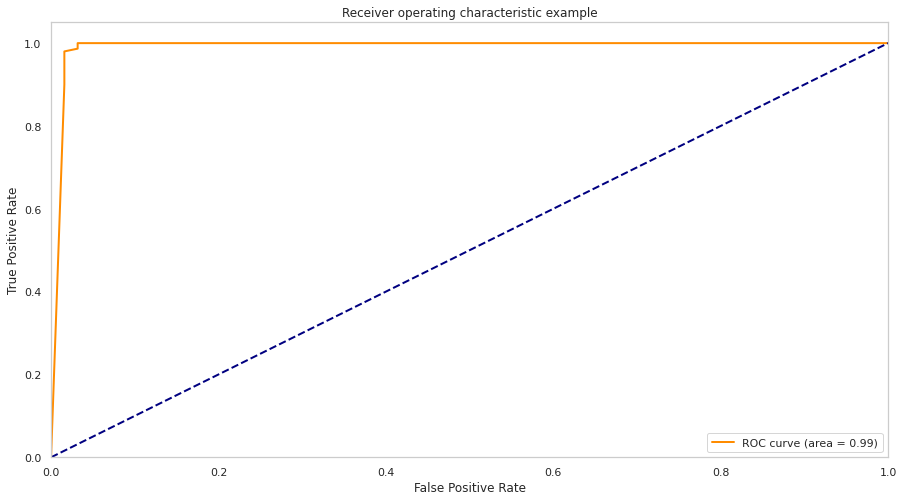

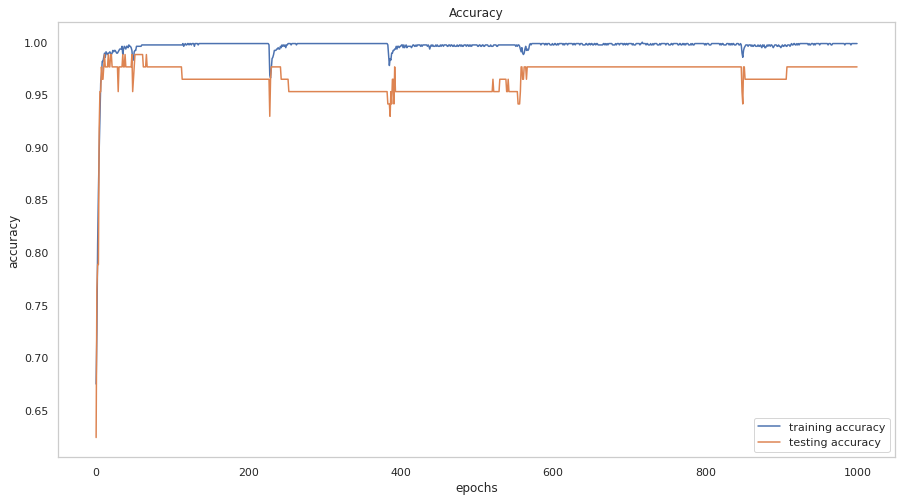

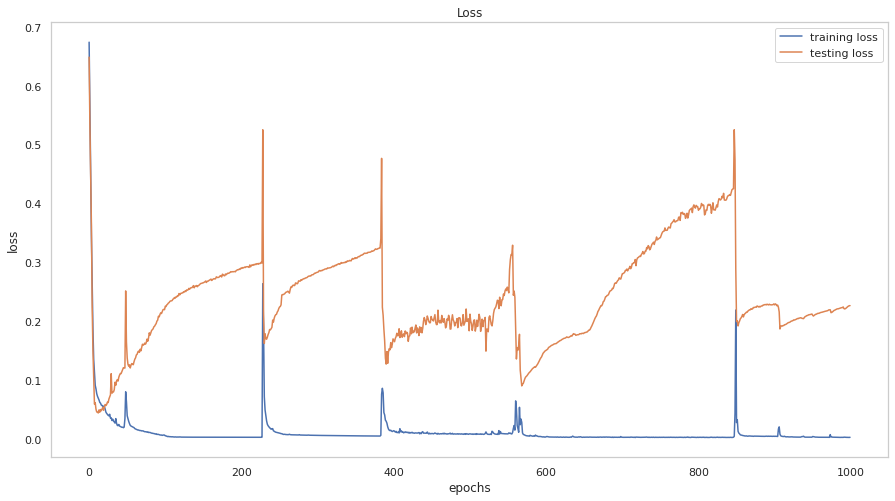

X_train_f:  (850, 1, 10)
Epoch 1/1000
26/26 [==============================] - 11s 49ms/step - loss: 0.6759 - accuracy: 0.6784 - val_loss: 0.6519 - val_accuracy: 0.6235
Epoch 2/1000
26/26 [==============================] - 0s 15ms/step - loss: 0.5595 - accuracy: 0.7098 - val_loss: 0.5354 - val_accuracy: 0.7647
Epoch 3/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.4429 - accuracy: 0.7974 - val_loss: 0.4479 - val_accuracy: 0.7765
Epoch 4/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.3555 - accuracy: 0.8458 - val_loss: 0.3944 - val_accuracy: 0.7882
Epoch 5/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.2905 - accuracy: 0.8667 - val_loss: 0.3041 - val_accuracy: 0.8588
Epoch 6/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.2227 - accuracy: 0.9190 - val_loss: 0.1987 - val_accuracy: 0.9529
Epoch 7/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.1522 - accuracy: 0.9503 - val_loss: 0.1

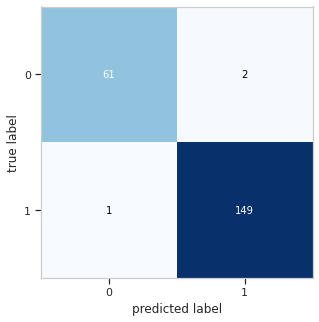

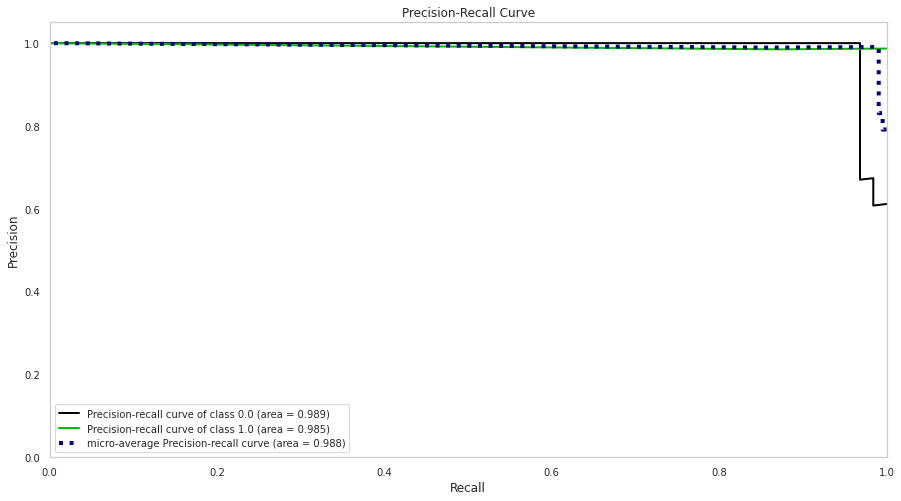

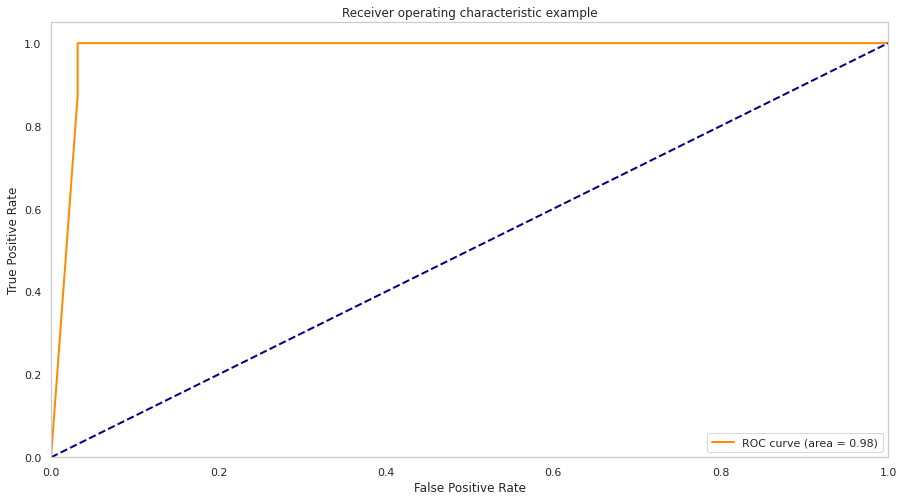

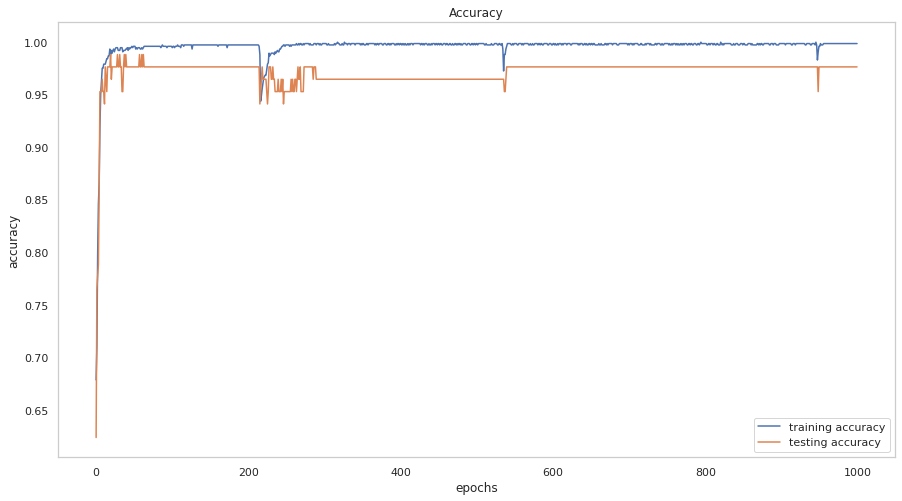

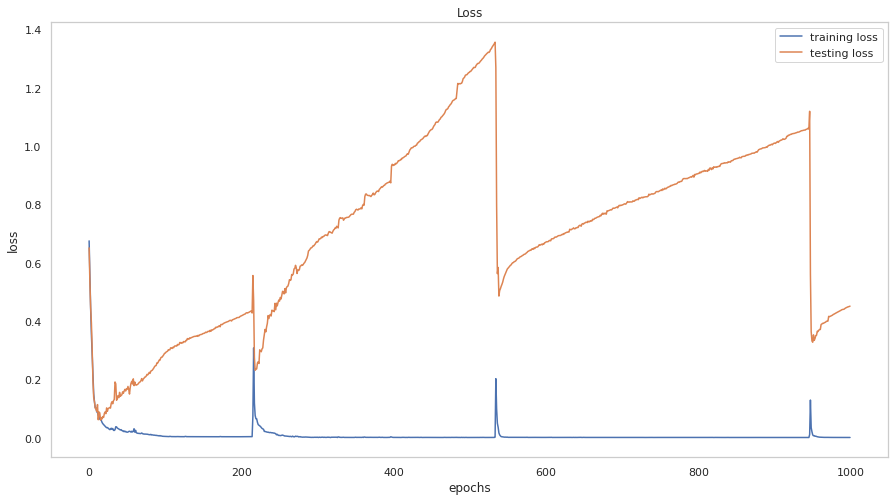

X_train_f:  (850, 1, 10)
Epoch 1/1000
26/26 [==============================] - 11s 52ms/step - loss: 0.6712 - accuracy: 0.6837 - val_loss: 0.6304 - val_accuracy: 0.6235
Epoch 2/1000
26/26 [==============================] - 0s 16ms/step - loss: 0.5418 - accuracy: 0.7281 - val_loss: 0.5187 - val_accuracy: 0.7882
Epoch 3/1000
26/26 [==============================] - 0s 16ms/step - loss: 0.4355 - accuracy: 0.8052 - val_loss: 0.4143 - val_accuracy: 0.8000
Epoch 4/1000
26/26 [==============================] - 0s 16ms/step - loss: 0.3273 - accuracy: 0.8588 - val_loss: 0.3277 - val_accuracy: 0.8471
Epoch 5/1000
26/26 [==============================] - 0s 15ms/step - loss: 0.2398 - accuracy: 0.9203 - val_loss: 0.2242 - val_accuracy: 0.9059
Epoch 6/1000
26/26 [==============================] - 0s 15ms/step - loss: 0.1741 - accuracy: 0.9412 - val_loss: 0.1522 - val_accuracy: 0.9647
Epoch 7/1000
26/26 [==============================] - 0s 15ms/step - loss: 0.1360 - accuracy: 0.9595 - val_loss: 0.1

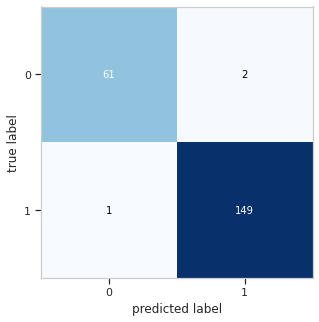

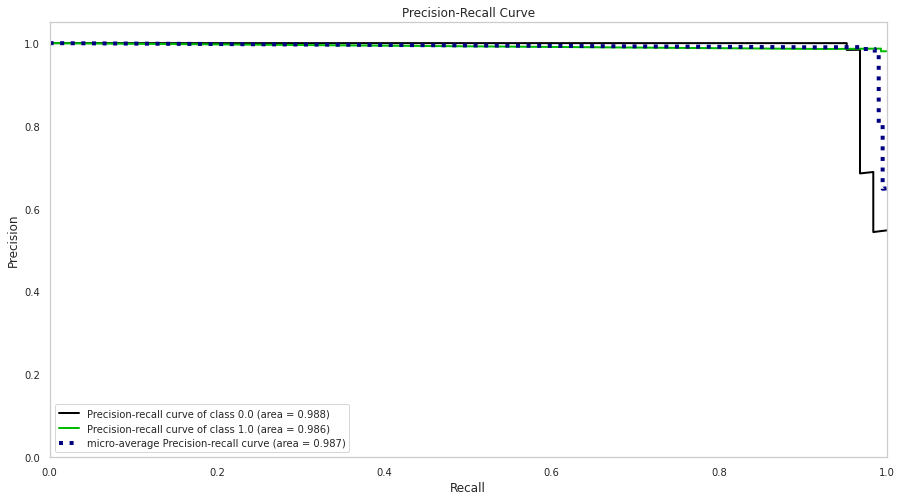

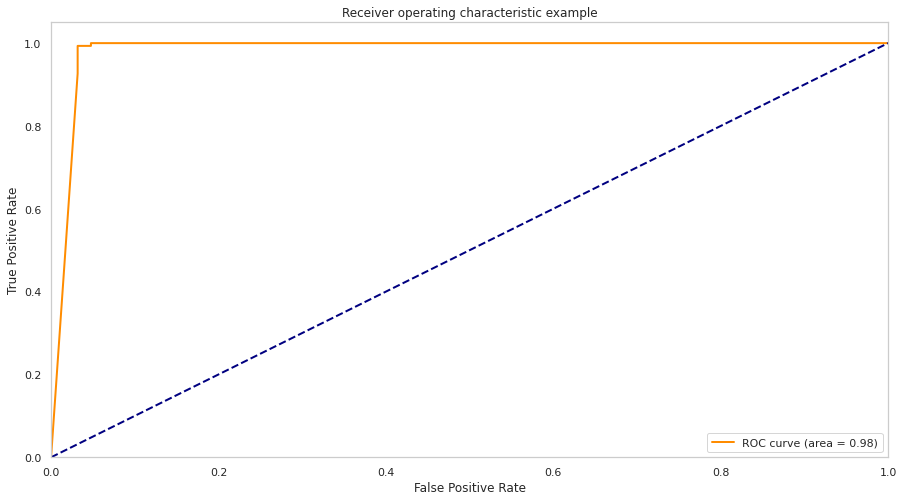

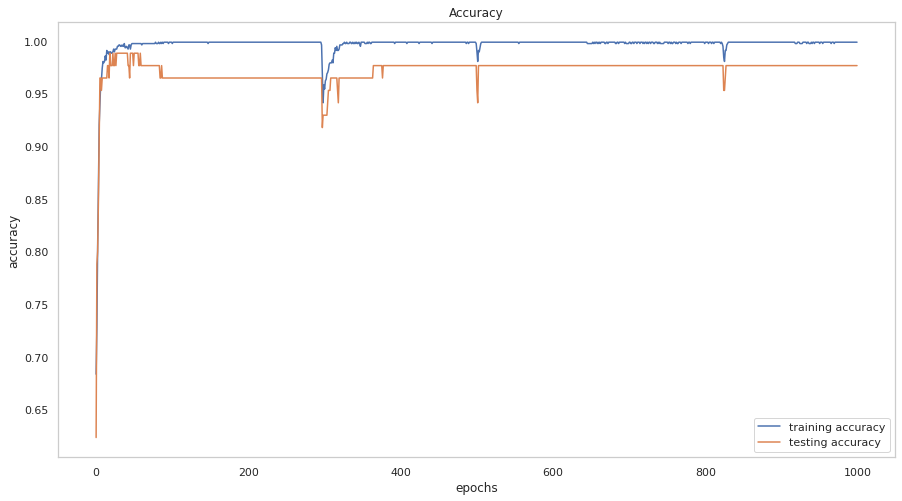

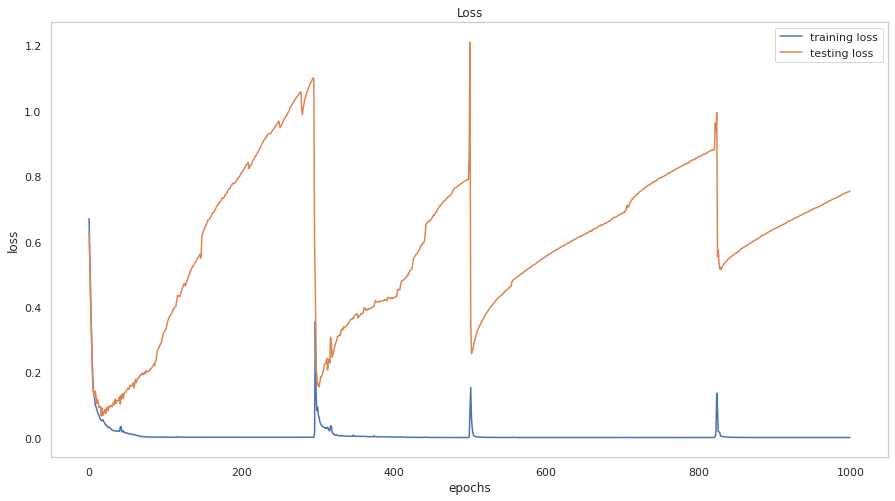

In [52]:
np.random.seed(12)
window1=1
N_layer1=2
path_model='./Single additional layer model/'
for n in [50,70,90,100]:
  Name1="LSTM_"+str(n)+'| Added Layer'
  fit_model(window1,n,N_layer1,X_train2,y_train,X_test2,y_test,Name1,path_model,score_table_3)

In [53]:
score_table_3

,Time,Accuracy,precision,recall,F1,F_b,Fb_metric
LSTM_50| Added Layer,395.162455,0.976526,0.976468,0.976526,0.976471,0.97652,0.976526
LSTM_70| Added Layer,422.621409,0.985915,0.985902,0.985915,0.985883,0.985914,0.985915
LSTM_90| Added Layer,465.238144,0.985915,0.985902,0.985915,0.985883,0.985914,0.985915
LSTM_100| Added Layer,487.48913,0.985915,0.985902,0.985915,0.985883,0.985914,0.985915


# HPO Algorithm 7: Genetic Algorithm

Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

###Advantages:

- Efficient with all types of HPs.
- Not require good initialization.

###Disadvantages:

- Poor capacity for parallelization.

# Using DEAP

In [54]:
!pip install sklearn-deap

     |████████████████████████████████| 160 kB 2.7 MB/s 


In [ ]:
#from sklearn import preprocessing
#col=ratios.columns
#X, y=ratios[col[1: ]], ratios[col[0]]
#X = preprocessing.minmax_scale(X)
# split into train and test
#lab_enc = preprocessing.LabelEncoder()
#y = lab_enc.fit_transform(y)

# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
#print(trainX.shape, testX.shape, trainy.shape ,testy.shape)

In [55]:
X_train,  X_test, y_train, y_test  = train_test_split(X_new, y, test_size=0.2, random_state=2)

X_train2 = np.reshape(array(X_train), (int(X_train.shape[0]/window), window, X_train.shape[1]))
X_test2  = np.reshape(array(X_test), (int(X_test.shape[0]/window), window,  X_test.shape[1] ))

y_train=y_train[:int(X_train.shape[0]/window)]
y_test=y_test[:int(X_test.shape[0]/window)]

X_train2.shape,y_train.shape, X_test2.shape,y_test.shape
print(X_train2.shape,y_train.shape, X_test2.shape,y_test.shape)

(850, 1, 10) (850,) (213, 1, 10) (213,)


In [56]:
#Random Forest
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': np.logspace(1,1.8,num = 10 ,base=20,dtype='int'),
    'max_depth': np.logspace(1,2,num = 10 ,base=10,dtype='int'),
    "max_features":np.logspace(0.2,1,num = 5 ,base=8,dtype='int'),
    "min_samples_split":np.logspace(0.4, 1, num=5, base=10, dtype='int'), #[2, 3, 5, 7, 10],
    "min_samples_leaf":np.logspace(0.1,1,num = 5 ,base=11,dtype='int'),
    "criterion":['gini','entropy']
}
rf_params = {
    'n_estimators': range(10,100),
    "max_features":range(1,trainX.shape[1]),
    'max_depth': range(5,50),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    #Categorical(name='criterion', categories=['gini','entropy'])#
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
# Set the hyperparameters of GA 
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=20,
                                   n_jobs=1)
ga1.fit(X,y)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

Types [1, 1, 1, 1, 1, 1] and maxint [89, 21, 44, 8, 9, 1] detected
--- Evolve in 16038000 possible combinations ---
gen	nevals	avg    	min     	max     	std        
0  	10    	0.99492	0.992474	0.995296	0.000862197
1  	9     	0.995296	0.995296	0.995296	0          
2  	4     	0.995296	0.995296	0.995296	0          
3  	8     	0.995296	0.995296	0.995296	0          
4  	5     	0.995296	0.995296	0.995296	0          
5  	7     	0.995296	0.995296	0.995296	0          
6  	4     	0.995296	0.995296	0.995296	0          
7  	8     	0.995296	0.995296	0.995296	0          
8  	2     	0.995296	0.995296	0.995296	0          
9  	7     	0.995296	0.995296	0.995296	0          
10 	6     	0.995296	0.995296	0.995296	0          
11 	10    	0.995296	0.995296	0.995296	0          
12 	6     	0.995202	0.994356	0.995296	0.00028222 
13 	6     	0.995296	0.995296	0.995296	0          
14 	10    	0.995202	0.994356	0.995296	0.00028222 
15 	6     	0.995202	0.994356	0.995296	0.00028222 
16 	6     	0.995202	0.994356	0.99529

In [57]:
#SVM
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.svm import SVC

svm_params = {
    'C': np.random.uniform(0,50,1000),
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=svm_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=30,
                                   n_jobs=1)
print(y)
ga1.fit(X, y)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1123    0.0
1124    0.0
1125    0.0
1126    0.0
1127    0.0
Name: Y, Length: 1063, dtype: float64
Types [2, 1] and maxint [999, 3] detected
--- Evolve in 4000 possible combinations ---
gen	nevals	avg    	min     	max     	std     
0  	10    	0.84666	0.654751	0.966134	0.116956
1  	6     	0.963123	0.950141	0.968015	0.00544976
2  	7     	0.965757	0.958608	0.968015	0.00249605
3  	6     	0.96651 	0.966134	0.968015	0.000752587
4  	5     	0.965099	0.953904	0.968015	0.00379688 
5  	4     	0.967262	0.966134	0.968015	0.000820113
6  	7     	0.967733	0.965193	0.968015	0.00084666 
7  	7     	0.949012	0.777987	0.968015	0.0570085  
8  	6     	0.968015	0.968015	0.968015	0          
9  	9     	0.968015	0.968015	0.968015	0          
10 	2     	0.968015	0.968015	0.968015	0          
11 	8     	0.944685	0.734713	0.968015	0.0699906  
12 	6     	0.966416	0.957667	0.968015	0.00336699 
13 	7     	0.936595	0.65381 	0.968015	0.0942615  
14 

In [58]:
#ANN
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'sgd',neurons=32,batch_size=2,epochs=20,activation='relu',patience=3,loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2,activation='sigmoid'))  # 10 is the number of classes in the dataset, you can change it based on your dataset
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, pd.get_dummies(y).values,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [59]:
#ANN
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [1, 2, 4, 8, 10],
    'neurons':range(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':range(3,20)
}
clf = KerasClassifier(build_fn=ANN, verbose=0)
# Set the hyperparameters of GA    
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=50,
                                   n_jobs=1)
ga1.fit(X, y)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

Types [1, 1, 1, 1, 1, 1] and maxint [2, 1, 4, 89, 1, 16] detected
--- Evolve in 91800 possible combinations ---
gen	nevals	avg    	min     	max     	std     
0  	10    	0.93396	0.785513	0.973659	0.058225
1  	5     	0.96952	0.955786	0.973659	0.00609955
2  	8     	0.973189	0.968956	0.973659	0.0014111 
3  	2     	0.973659	0.973659	0.973659	0         
4  	6     	0.973659	0.973659	0.973659	0         
5  	4     	0.971214	0.9492  	0.973659	0.00733772
6  	8     	0.972625	0.963311	0.973659	0.00310442
7  	7     	0.972437	0.96143 	0.973659	0.00366886
8  	5     	0.973659	0.973659	0.973659	0         
9  	8     	0.970555	0.952963	0.973659	0.006626  
10 	8     	0.972248	0.959548	0.973659	0.0042333 
11 	5     	0.973659	0.973659	0.973659	0         
12 	5     	0.973659	0.973659	0.973659	0         
13 	8     	0.964064	0.903104	0.973659	0.0216851 
14 	8     	0.973659	0.973659	0.973659	0         
15 	10    	0.97206 	0.957667	0.973659	0.00479774
16 	2     	0.973848	0.973659	0.975541	0.00056444
17 	6     	0.

# **Good Luck**